In [1]:
from fastai.datasets import Config
from fastai.tabular import *
import pandas as pd

# Competiton files setup

In [2]:
data_path = Config.data_path()/'titanic'
data_path.mkdir(parents=True, exist_ok=True)
data_path

PosixPath('/home/krzysiek/.fastai/data/titanic')

In [20]:
!kaggle competitions files -c titanic

name                   size  creationDate         
---------------------  ----  -------------------  
train.csv              60KB  2013-06-28 13:40:25  
test.csv               28KB  2013-06-28 13:40:24  
gender_submission.csv   3KB  2017-02-01 01:49:18  


In [18]:
!kaggle competitions download -c titanic -p {data_path}

  0%|                                               | 0.00/59.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 59.8k/59.8k [00:00<00:00, 1.34MB/s]
  0%|                                               | 0.00/28.0k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 28.0k/28.0k [00:00<00:00, 453kB/s]
  0%|                                               | 0.00/3.18k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 3.18k/3.18k [00:00<00:00, 378kB/s]


# Data exploration

In [3]:
train_df = pd.read_csv(data_path/'train.csv')
test_df = pd.read_csv(data_path/'test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"Train length: {len(train_df)}")
print(f"Test length: {len(test_df)}")

Train length: 891
Test length: 418


In [6]:
# Only for demonstration purposes - not a valid test set
sample_submission_df = pd.read_csv(data_path/'gender_submission.csv')
sample_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
# Name can be used to infer sex value or age (by marrianl status)
# But it looks like sex column is filled in all cases
print(f"Train empty sex fields: {len(train_df[~train_df['Sex'].isin(['male', 'female'])])}")
print(f"Test empty sex fields: {len(test_df[~test_df['Sex'].isin(['male', 'female'])])}")

Train empty sex fields: 0
Test empty sex fields: 0


In [8]:
# Significant amount of data don't have age column; it could be probably extrapolated from Name column
empty_ages_train_df = train_df[train_df['Age'].isin(["NaN"])]
empty_ages_test_df = test_df[test_df['Age'].isin(["NaN"])]
print(f"Train empty age fields: {len(empty_ages_train_df)}/{len(train_df)}")
print(f"Test empty age fields: {len(empty_ages_test_df)}/{len(test_df)}")
empty_ages_train_df.head()

Train empty age fields: 177/891
Test empty age fields: 86/418


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [9]:
# Is there a correlation between age and fare? Looks like no, but it can be explored futher
train_df[train_df['Age'].isin(range(10))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [10]:
train_df[train_df['Age'].isin(range(18, 50))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Final data preparation

In [11]:
procs = [FillMissing, Categorify, Normalize] # preprocessing pipeline

In [26]:
dep_var = 'Survived' # Variable to predict
cat_vars = ['Pclass', 'Sex', 'Embarked']
cont_vars = ['Age', 'SibSp', 'Parch', 'Fare']
final_train_df = train_df[cat_vars + cont_vars + [dep_var]]
final_test_df = test_df[cat_vars + cont_vars]

In [18]:
final_train_df.head()

,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare,Survived
0,3,male,S,22.0,1,0,7.2500,0
1,1,female,C,38.0,1,0,71.2833,1
2,3,female,S,26.0,0,0,7.9250,1
3,1,female,S,35.0,1,0,53.1000,1
4,3,male,S,35.0,0,0,8.0500,0


In [19]:
final_test_df.head()

,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,3,male,Q,34.5,0,0,7.8292
1,3,female,S,47.0,1,0,7.0000
2,2,male,Q,62.0,0,0,9.6875
3,3,male,S,27.0,0,0,8.6625
4,3,female,S,22.0,1,1,12.2875


In [59]:
print(len(final_train_df[final_train_df['Fare'].isin(["NaN"])]))
print(len(final_test_df[final_test_df['Fare'].isin(["NaN"])]))

0
1


In [60]:
final_test_df[final_test_df['Fare'].isin(["NaN"])]

,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
152,3,male,S,60.5,0,0,NaN


In [61]:
final_test_df = final_test_df.fillna(15.0)

In [62]:
test = TabularList.from_df(final_test_df, path=data_path, cat_names=cat_vars, cont_names=cont_vars)

data = (TabularList
        .from_df(final_train_df, path=data_path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
        .random_split_by_pct()
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch()
       )

In [63]:
data.show_batch()

Pclass,Sex,Embarked,Age_na,Age,SibSp,Parch,Fare,target
1,female,S,False,1.8258,1.3916,-0.4863,0.3658,1
3,female,S,False,0.0622,0.4493,0.7303,-0.1667,0
1,male,C,False,2.2092,-0.4930,-0.4863,-0.0586,0
3,male,S,False,0.8290,-0.4930,-0.4863,-0.4835,0
2,female,S,False,-0.0144,0.4493,-0.4863,-0.1307,1


# Defining the model

In [64]:
learn = tabular_learner(data, layers=[300, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


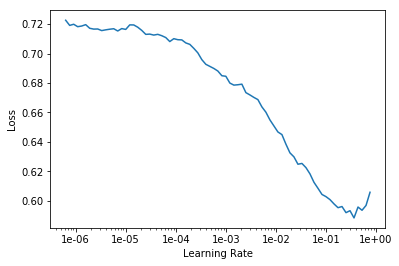

In [65]:
learn.lr_find()
learn.recorder.plot()

In [66]:
learn.fit_one_cycle(10, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
1,0.621573,0.648843,0.662921,00:02
2,0.554470,0.533766,0.713483,00:02
3,0.514429,0.438377,0.780899,00:02
4,0.497018,0.423366,0.831461,00:02
5,0.481955,0.392130,0.848315,00:02
6,0.469780,0.390165,0.859551,00:02
7,0.455952,0.386868,0.859551,00:02
8,0.443234,0.389295,0.853933,00:02
9,0.430413,0.403097,0.859551,00:02
10,0.421955,0.399108,0.859551,00:02


In [68]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


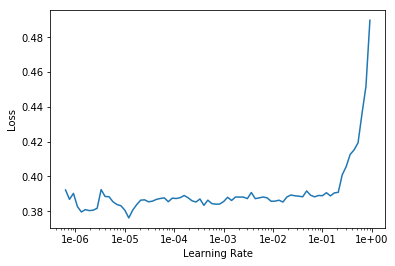

In [67]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
1,0.388837,0.400504,0.853933,00:02
2,0.390383,0.399338,0.853933,00:02
3,0.389139,0.396860,0.865169,00:02
4,0.384776,0.397412,0.865169,00:02
5,0.381091,0.395530,0.865169,00:02


In [70]:
learn.save('state-2')

# Final prediction and submission to Kaggle

In [99]:
preds, _ = learn.get_preds(DatasetType.Test)
assert(len(test_df) == len(preds))

In [105]:
survived = np.argmax(preds, 1)

In [106]:
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': survived})

In [107]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [109]:
submission_df.to_csv(data_path/'submission.csv', index=False)

In [112]:
!kaggle competitions submit titanic -f {data_path/'submission.csv'} -m "Using Fast ai (first submission, was 86% acc on training)"

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 15.5kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster